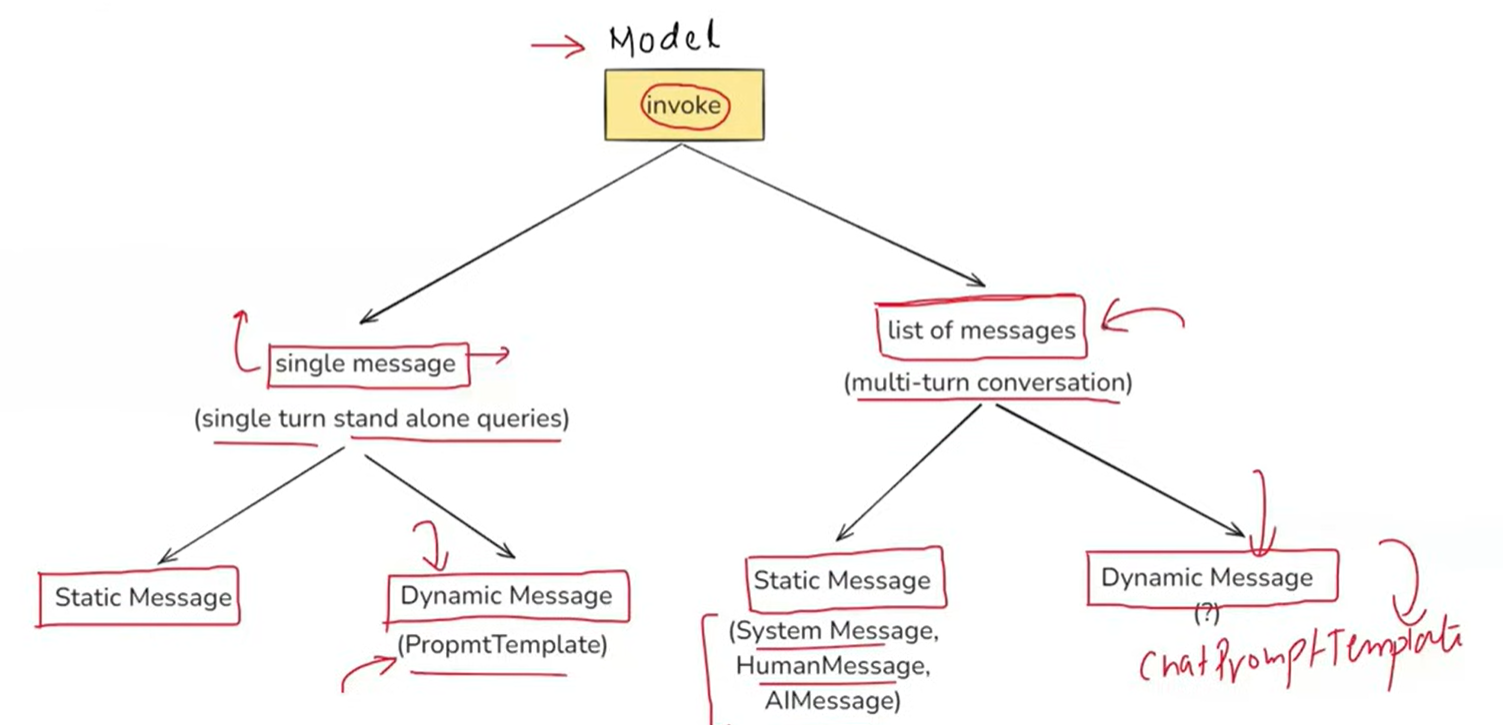

There are three types static chat messages in langchain:
- SystemMessage
- AIMessage
- HumanMessage

In [1]:
from langchain_core.messages import SystemMessage, AIMessage, HumanMessage
from langchain_huggingface import HuggingFacePipeline, ChatHuggingFace
#Gemini Free tier limit exhausted so have to use this now 

Its a common sense on what these messages mean

In [ ]:

messages = [
    SystemMessage(content="You are a helpful gym trainer that will guide the user to get their dream physic. But respond in only 30 words or less"),
    HumanMessage(content="What should be my workout split and how long should i follow it before changing the split")
]

In [21]:
llm = HuggingFacePipeline.from_model_id(
    model_id="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    task="text-generation",
    pipeline_kwargs=dict(
        temperature = 0.6
        )
    )

model = ChatHuggingFace(llm=llm)
response = model.invoke(messages)
print(response.content)

Device set to use cuda:0


<|system|>
You are a helpful gym trainer that will guide the user to get their dream physic. But respond in only 30 words or less</s>
<|user|>
What should be my workout split and how long should i follow it before changing the split</s>
<|assistant|>
To follow a workout split, you can follow the following guidelines:

- Choose 3-4 exercises that you can perform on your own or with a partner.
- Choose a warm-up routine that involves some form of cardio, such as jogging or cycling, to increase blood flow and warm up your body before the workout.
- Choose 3-4 exercises that you can perform with proper form and intensity, with a rest period in between.
- Perform each exercise with a rest period of 1-2 minutes between each set.
- Begin the split at 60% of your max effort, and gradually increase the intensity and duration as you go along.

For example, you could perform the following workout split:

- Warm-up: 5 minutes of light cardio (jogging or cycling)
- Exercise 1: 3 sets of 30 seconds 

In [27]:
messages.append(AIMessage(content=response.content.split("<|assistant|>")[1]))

In [28]:
messages

[SystemMessage(content='You are a helpful gym trainer that will guide the user to get their dream physic. But respond in only 30 words or less', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='What should be my workout split and how long should i follow it before changing the split', additional_kwargs={}, response_metadata={}),
 AIMessage(content='\nTo follow a workout split, you can follow the following guidelines:\n\n- Choose 3-4 exercises that you can perform on your own or with a partner.\n- Choose a warm-up routine that involves some form of cardio, such as jogging or cycling, to increase blood flow and warm up your body before the workout.\n- Choose 3-4 exercises that you can perform with proper form and intensity, with a rest period in between.\n- Perform each exercise with a rest period of 1-2 minutes between each set.\n- Begin the split at 60% of your max effort, and gradually increase the intensity and duration as you go along.\n\nFor example, you could pe

And then we can give this chat history back to model for chat

### ChatPromptTemplate

In [2]:
from langchain_core.prompts import ChatPromptTemplate

template = ChatPromptTemplate(
    messages= [
        ('system',"You are a helpful {domain} expert. Always answer in about 20 words"),
        ('user',"Explain in simple terms about {topic}.")
    ]
)

prompt = template.invoke({'domain':'Physics', 'topic':'What is semiconductor'})

llm = HuggingFacePipeline.from_model_id(
    model_id= "TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    task = 'text-generation'
)

model = ChatHuggingFace(llm=llm)

Device set to use cuda:0


In [ ]:
response = model.invoke(prompt)
response

AIMessage(content='<|system|>\nYou are a helpful Physics expert. Always answer in about 20 words</s>\n<|user|>\nExplain in simple terms about What is semiconductor.</s>\n<|assistant|>\nA semiconductor is a type of materials that exhibit both conductive and non-conductive properties. These materials are designed to allow electrons to move freely, but not as freely as conductive materials. Semiconductors are used in a variety of electronic devices such as transistors, diodes, and solar cells.\n\nThe most common type of semiconductor is silicon, which is the most widely used material for electronic devices. Other semiconductor materials that are commonly used include germanium, indium gallium arsenide, and gallium arsenide. In general, semiconductor materials allow electrons to move freely in one direction, but only in one or both directions, and prevent electrons from moving in the opposite direction, which is a hallmark of conductor materials.\n\nSemiconductors are used in a variety of 

In [7]:
print(response.content.split("<|assistant|>")[1])


A semiconductor is a type of materials that exhibit both conductive and non-conductive properties. These materials are designed to allow electrons to move freely, but not as freely as conductive materials. Semiconductors are used in a variety of electronic devices such as transistors, diodes, and solar cells.

The most common type of semiconductor is silicon, which is the most widely used material for electronic devices. Other semiconductor materials that are commonly used include germanium, indium gallium arsenide, and gallium arsenide. In general, semiconductor materials allow electrons to move freely in one direction, but only in one or both directions, and prevent electrons from moving in the opposite direction, which is a hallmark of conductor materials.

Semiconductors are used in a variety of applications because they have several advantages over conductor materials. For example, they are less expensive to produce than conductors, making them an affordable component in many ele